In [54]:
import random, pylab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):     # 37 pockets in a wheel
            self.pockets.append(i)
        self.ball = None         # currently ball is in no pocket
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

In [56]:
def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

In [57]:
random.seed(0)
game = FairRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

100 spins of Fair Roulette
Expected return betting 2 = -100.0%

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.046%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.602%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.7964%



In [58]:
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

In [59]:
class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

In [60]:
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

In [61]:
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []

In [62]:
for numSpins in (1000, 10000, 100000, 1000000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',
             str(round(expReturn, 4)) + '%')


Simulate 20 trials of 1000 spins each
Exp. return for Fair Roulette = 6.56%
Exp. return for European Roulette = -2.26%
Exp. return for American Roulette = -8.92%

Simulate 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.234%
Exp. return for European Roulette = -4.168%
Exp. return for American Roulette = -5.752%

Simulate 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.8144%
Exp. return for European Roulette = -2.6506%
Exp. return for American Roulette = -5.113%

Simulate 20 trials of 1000000 spins each


KeyboardInterrupt: 

***
## Monte Carlo Integration

Integeral is given by,
$$ I\approx Q_{N}\equiv V{\frac {1}{N}}\sum _{{i=1}}^{N}f(\overline {{\mathbf {x}}}_{i})=V\langle f\rangle $$
where $V$ is the volume of the region of integration, $\overline {{\mathbf {x}}}_{i}$ is a random point in the region of integration, and $\langle f\rangle $ is the average value of $f$ over the region of integration.

The error in the integral is given by,
$$ {\mathrm {Var}}(f)\equiv \sigma _{N}^{2}={\frac {1}{N-1}}\sum _{{i=1}}^{N}\left(f(\overline {{\mathbf {x}}}_{i})-\langle f\rangle \right)^{2}$$

which tends to,
$$ {\mathrm {Var}}(Q_{N})={\frac {V^{2}}{N^{2}}}\sum _{{i=1}}^{N}{\mathrm {Var}}(f)=V^{2}{\frac {{\mathrm {Var}}(f)}{N}}=V^{2}{\frac {\sigma _{N}^{2}}{N}} $$



---

$$ \int_{a}^{b} f(x) dx = (b-a)*\frac{1}{N} \sum_{i=1}^{N} f(x_i)  = (b-a)*\frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{max(f)}*max(f)  $$

$$ \int_{a}^{b} f(x) dx = (b-a)*\frac{1}{N} \sum_{i=1}^{N} f(x_i)  =  (b-a)*\frac{1}{N} \sum_{i=1}^{N} P(x_i)*max(f) $$

Let's reduce the sample size by playing lottery
For each events throw a dice and see if we keep or regect the event

$$ \int_{a}^{b} f(x) dx = (b-a)*\frac{1}{N} \sum_{i=1}^{N} f(x_i)  =  (b-a)*\frac{1}{N} \sum_{i=1}^{N} P(x_i)*max(f) = \frac{max(f)}{N}\sum_{i=1}^{n}1 $$

In [ ]:
# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000

# array of zeros of length N
ar = np.zeros(N)

# iterating over each Value of ar and filling
# it with a random value between the limits a
# and b
for i in range (len(ar)):
	ar[i] = random.uniform(a,b)
	


# variable to store sum of the functions of
# different values of x
integral = 0.0

# function to calculate the sin of a particular
# value of x
def f(x):
	return np.sin(x)

# iterates and sums up values of different functions
# of x
n=0
for i in ar:
	integral += f(i)
	if random.uniform(0,1) < f(i):
		n +=1
		
# we get the answer by the formula derived adobe
ans = ((b-a)/float(N))*integral
print(n*(b-a)/N)

# prints the solution
print ("The value calculated by monte carlo integration is {}.".format(ans))


1.9949113350295187
The value calculated by monte carlo integration is 1.9957449373409553.


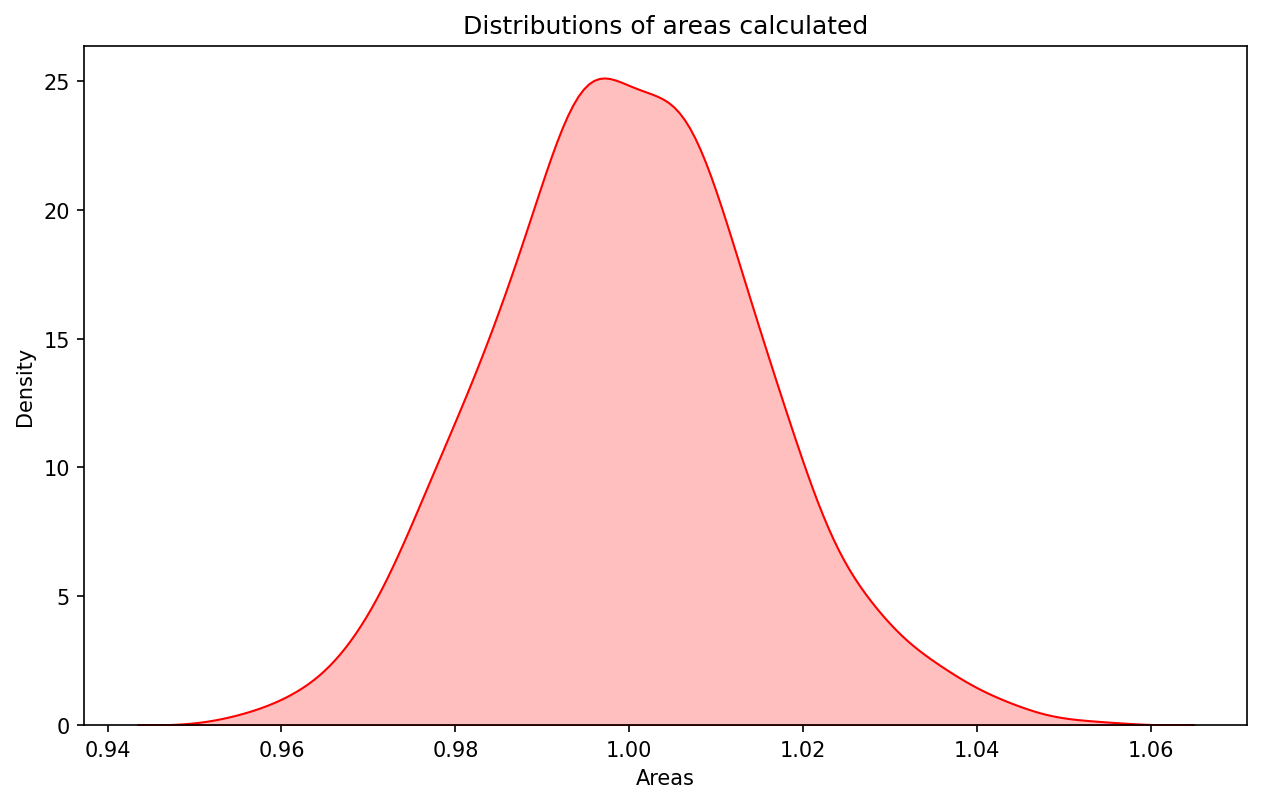

In [ ]:
# importing the modules
import random
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6),dpi=150)
# limits of integration
a = 0
b = np.pi/2 # gets the value of pi
N = 1000

# function to calculate the sin of a particular
# value of x
def f(x):
	return np.sin(x)

# list to store all the values for plotting
plt_vals = []
variance = []
# we iterate through all the values to generate
# multiple results and show whose intensity is
# the most.
for i in range(N):
	
	#array of zeros of length N
	ar = np.zeros(N)

	# iterating over each Value of ar and filling it
	# with a random value between the limits a and b
	for i in range (len(ar)):
		ar[i] = random.uniform(a,b)

	# variable to store sum of the functions of different
	# values of x
	integral = 0.0

	# iterates and sums up values of different functions
	# of x
	for i in ar:
		integral += f(i)

	# we get the answer by the formula derived adobe
	ans = (b-a)/float(N)*integral

	# appends the solution to a list for plotting the graph
	plt_vals.append(ans)		

# details of the plot to be generated
# sets the title of the plot
plt.title("Distributions of areas calculated")

# 3 parameters (array on which histogram needs
sns.kdeplot(plt_vals, shade=True, color="r")

# to be made, bins, separators colour between the
# beams)
# sets the label of the x-axis of the plot
plt.xlabel("Areas")
plt.show() # shows the plot
